# importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# loading the data set file
df=pd.read_csv("creditcard.csv")
# list the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# list the last five rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# drop the columns of time
df.drop(['Time'], axis = 1, inplace=True)

In [8]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
## 
df.drop_duplicates(inplace = True)

In [10]:
# we have 1085 duplicates after applying drop function there is no duplicate value in dataframe 

In [11]:
df.duplicated().sum()

0

In [12]:
#distribution of legit transaction & Fraudulent transaction
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [13]:
# sns.pairplot(df)

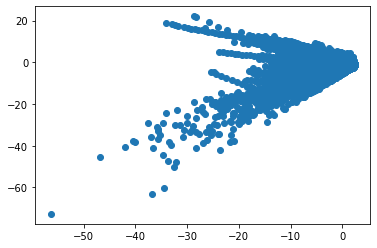

In [14]:
# to check the scatter plot

import matplotlib.pyplot as plt
plt.scatter(df.V1 ,df.V2)
plt.show()

<AxesSubplot:>

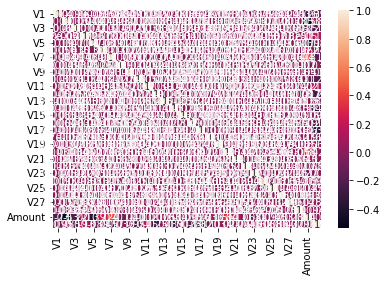

In [15]:
# to check the heatmap fo correlation 
corr = df.corr()
sns.heatmap(corr,annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V1', ylabel='Density'>

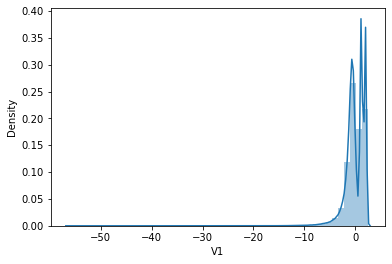

In [16]:
# to check the indutial value of displot

sns.distplot(df["V1"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V6', ylabel='Density'>

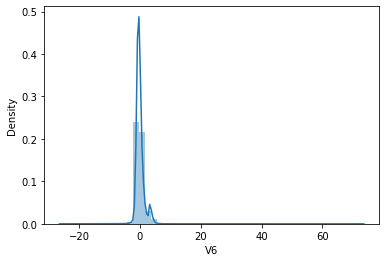

In [17]:
sns.distplot(df["V6"])

In [18]:
# sns.pairplot(df)

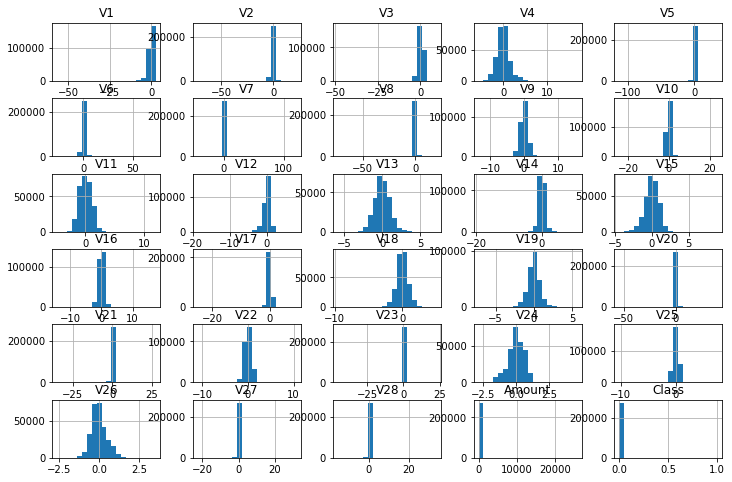

In [19]:
df.hist(figsize=(12,8),bins=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


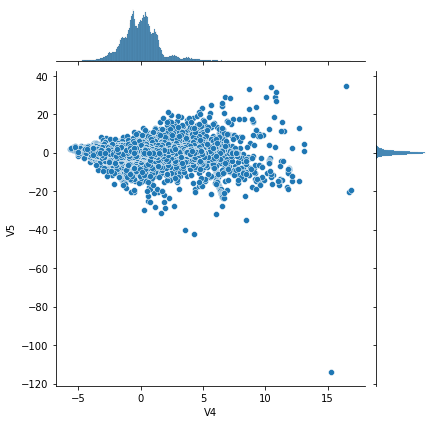

In [20]:
sns.jointplot(df['V4'], df['V5'])

In [21]:
# sns.stripplot(df['V3'], df['V8'])

In [22]:
#applying min max scalaer
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

minmax_scale
#df[Amount] = minmax_scale.fit_transform([df.Amount])

df['Amount'] = minmax_scale.fit_transform(df[['Amount']])

df['Amount'].head(5)

0    0.005824
1    0.000105
2    0.014739
3    0.004807
4    0.002724
Name: Amount, dtype: float64

In [23]:
df['Amount'].min(), df['Amount'].max() 

(0.0, 1.0)

In [24]:
df.Amount

0         0.005824
1         0.000105
2         0.014739
3         0.004807
4         0.002724
            ...   
284802    0.000030
284803    0.000965
284804    0.002642
284805    0.000389
284806    0.008446
Name: Amount, Length: 275663, dtype: float64

<AxesSubplot:>

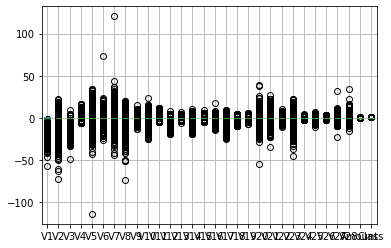

In [25]:
df.boxplot()

In [26]:
# to find the skewness 
df.skew()

V1        -3.273070
V2        -4.653486
V3        -2.216730
V4         0.681387
V5        -2.458790
V6         1.867576
V7         2.877722
V8        -8.292631
V9         0.550965
V10        1.242165
V11        0.347772
V12       -2.208171
V13        0.061058
V14       -1.953613
V15       -0.295836
V16       -1.048371
V17       -3.802987
V18       -0.255710
V19        0.115957
V20       -2.045060
V21        2.784302
V22       -0.200868
V23       -5.805236
V24       -0.545636
V25       -0.408260
V26        0.587603
V27       -0.745732
V28       11.400938
Amount    16.841622
Class     24.079142
dtype: float64

## skewness

In [27]:
from scipy.stats import skew

V1
-3.2730526029747113


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


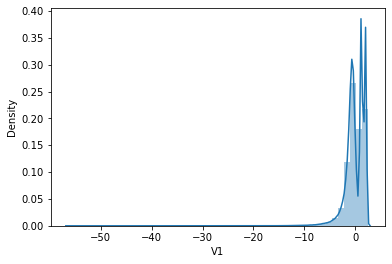

V2
-4.653461126596145


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


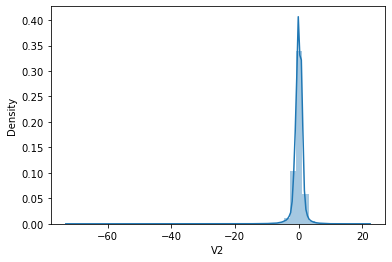

V3
-2.2167176908112145


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


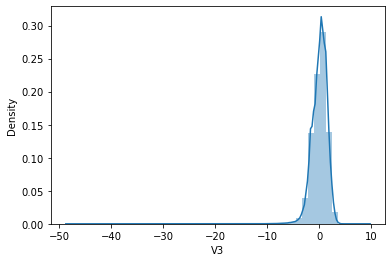

V4
0.6813835094682708


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


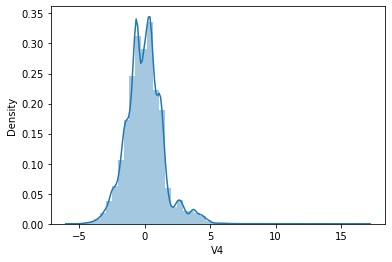

V5
-2.458776924478226


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


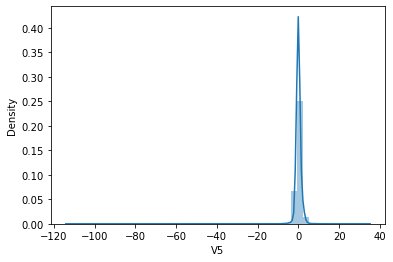

V6
1.8675658880622323


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


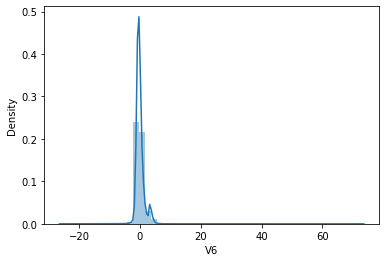

V7
2.877706353154743


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


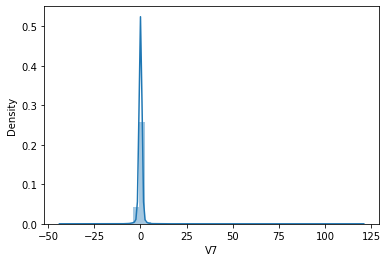

V8
-8.292585835778569


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


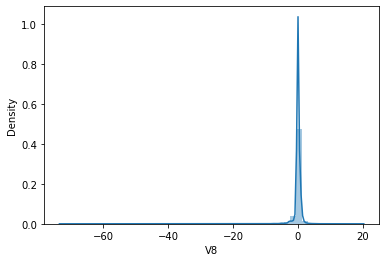

V9
0.5509624865407241


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


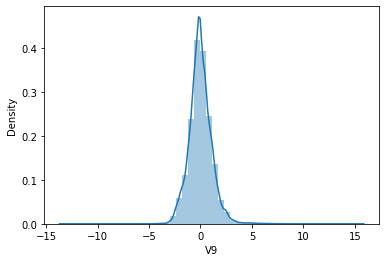

V10
1.2421578000057945


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


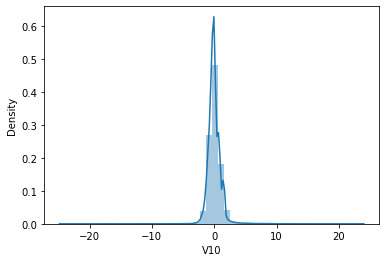

V11
0.3477696638811386


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


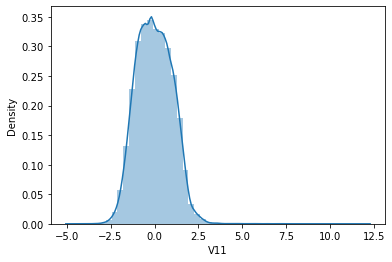

V12
-2.2081589225746074


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


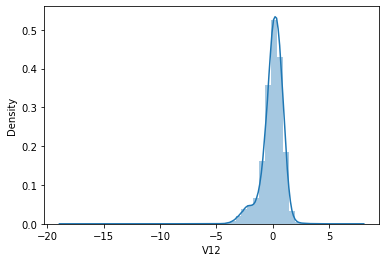

V13
0.06105794279605176


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


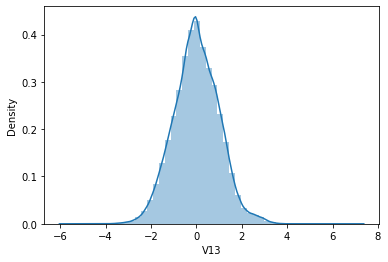

V14
-1.95360278853419


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


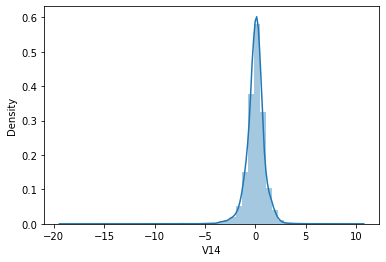

V15
-0.29583412725491975


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


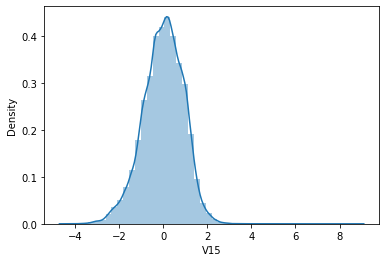

V16
-1.0483649102783459


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


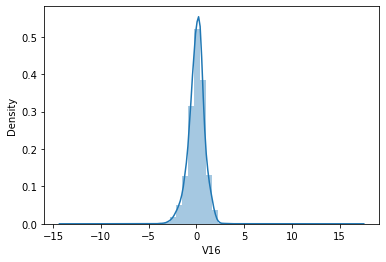

V17
-3.8029659111385916


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


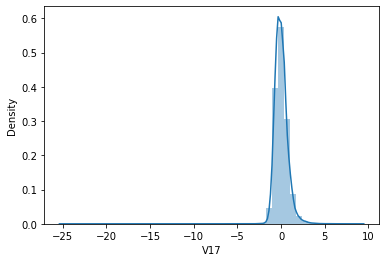

V18
-0.2557086316117268


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


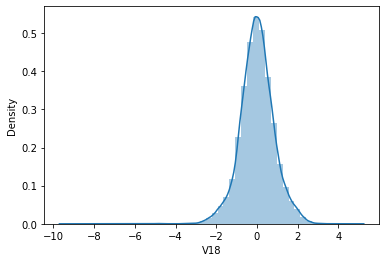

V19
0.11595594763462057


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


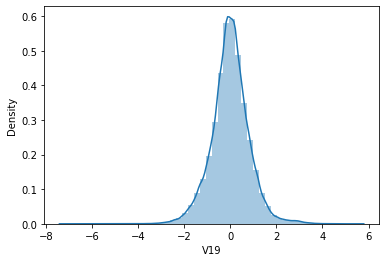

V20
-2.0450486649145834


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


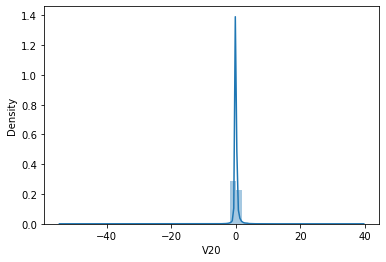

V21
2.7842870260668886


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


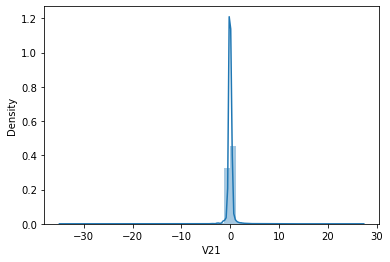

V22
-0.20086694305031727


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


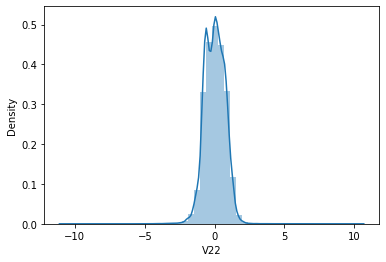

V23
-5.805204363955046


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


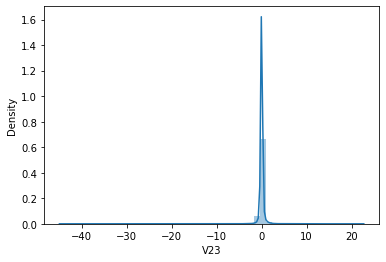

V24
-0.5456329055794981


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


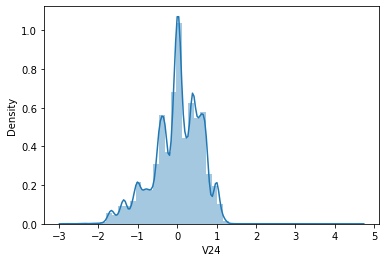

V25
-0.40825767376138555


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


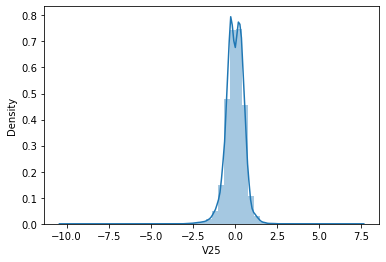

V26
0.587599391377193


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


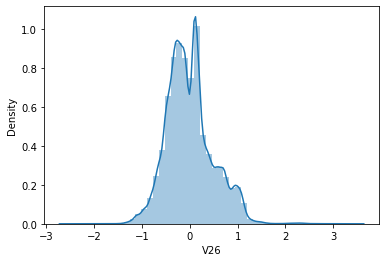

V27
-0.7457283925073764


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


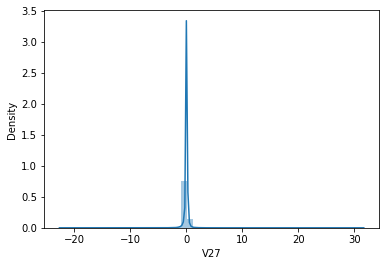

V28
11.400875989072759


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


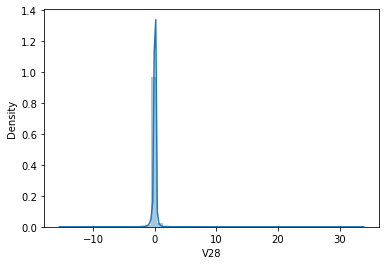

Amount
16.841530476199733


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


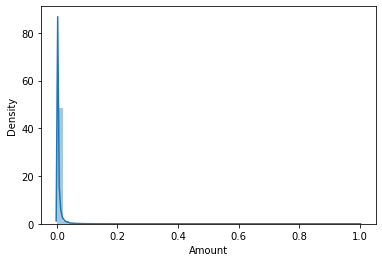

Class
24.079010755875967


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


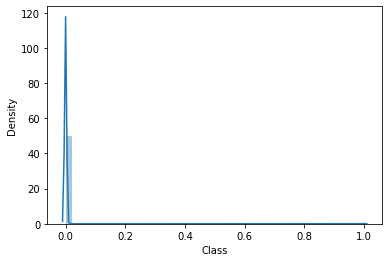

In [28]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [29]:
# to find the value of skewness in heat map

<AxesSubplot:>

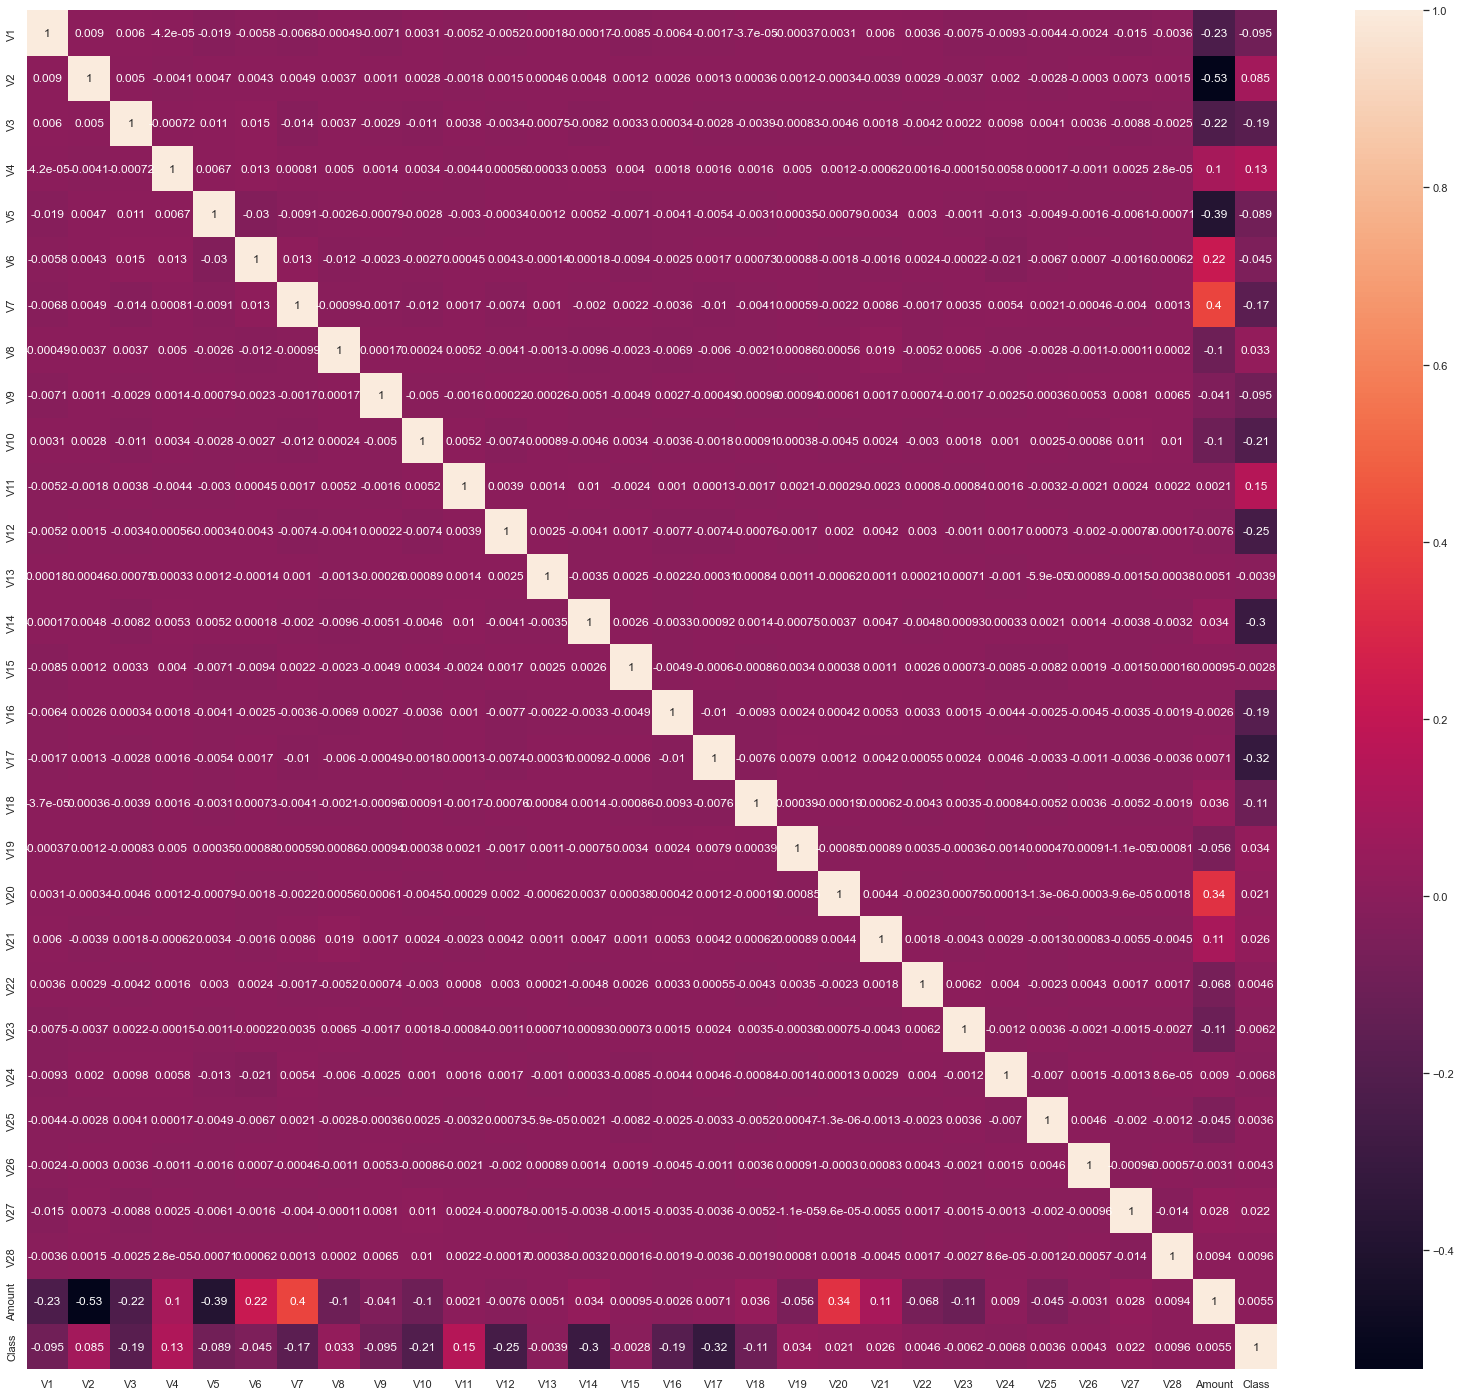

In [30]:
sns.set(rc={'figure.figsize':(28,25)})
corr = df.corr()
sns.heatmap(corr, annot=True)

In [31]:
#  i am using squarroot method for remove the high level skew

In [32]:
df["Amount"]=np.sqrt(df["Amount"])

In [33]:
skew(df["Amount"])

2.805539581389325

In [34]:
np.log(11)

2.3978952727983707

# Outliers

In [35]:
df_o=df.iloc[:,:29]
df_o

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.076314
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.010233
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.121404
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.069333
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.052195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.005475
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.031063
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.051402
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.019729


<AxesSubplot:>

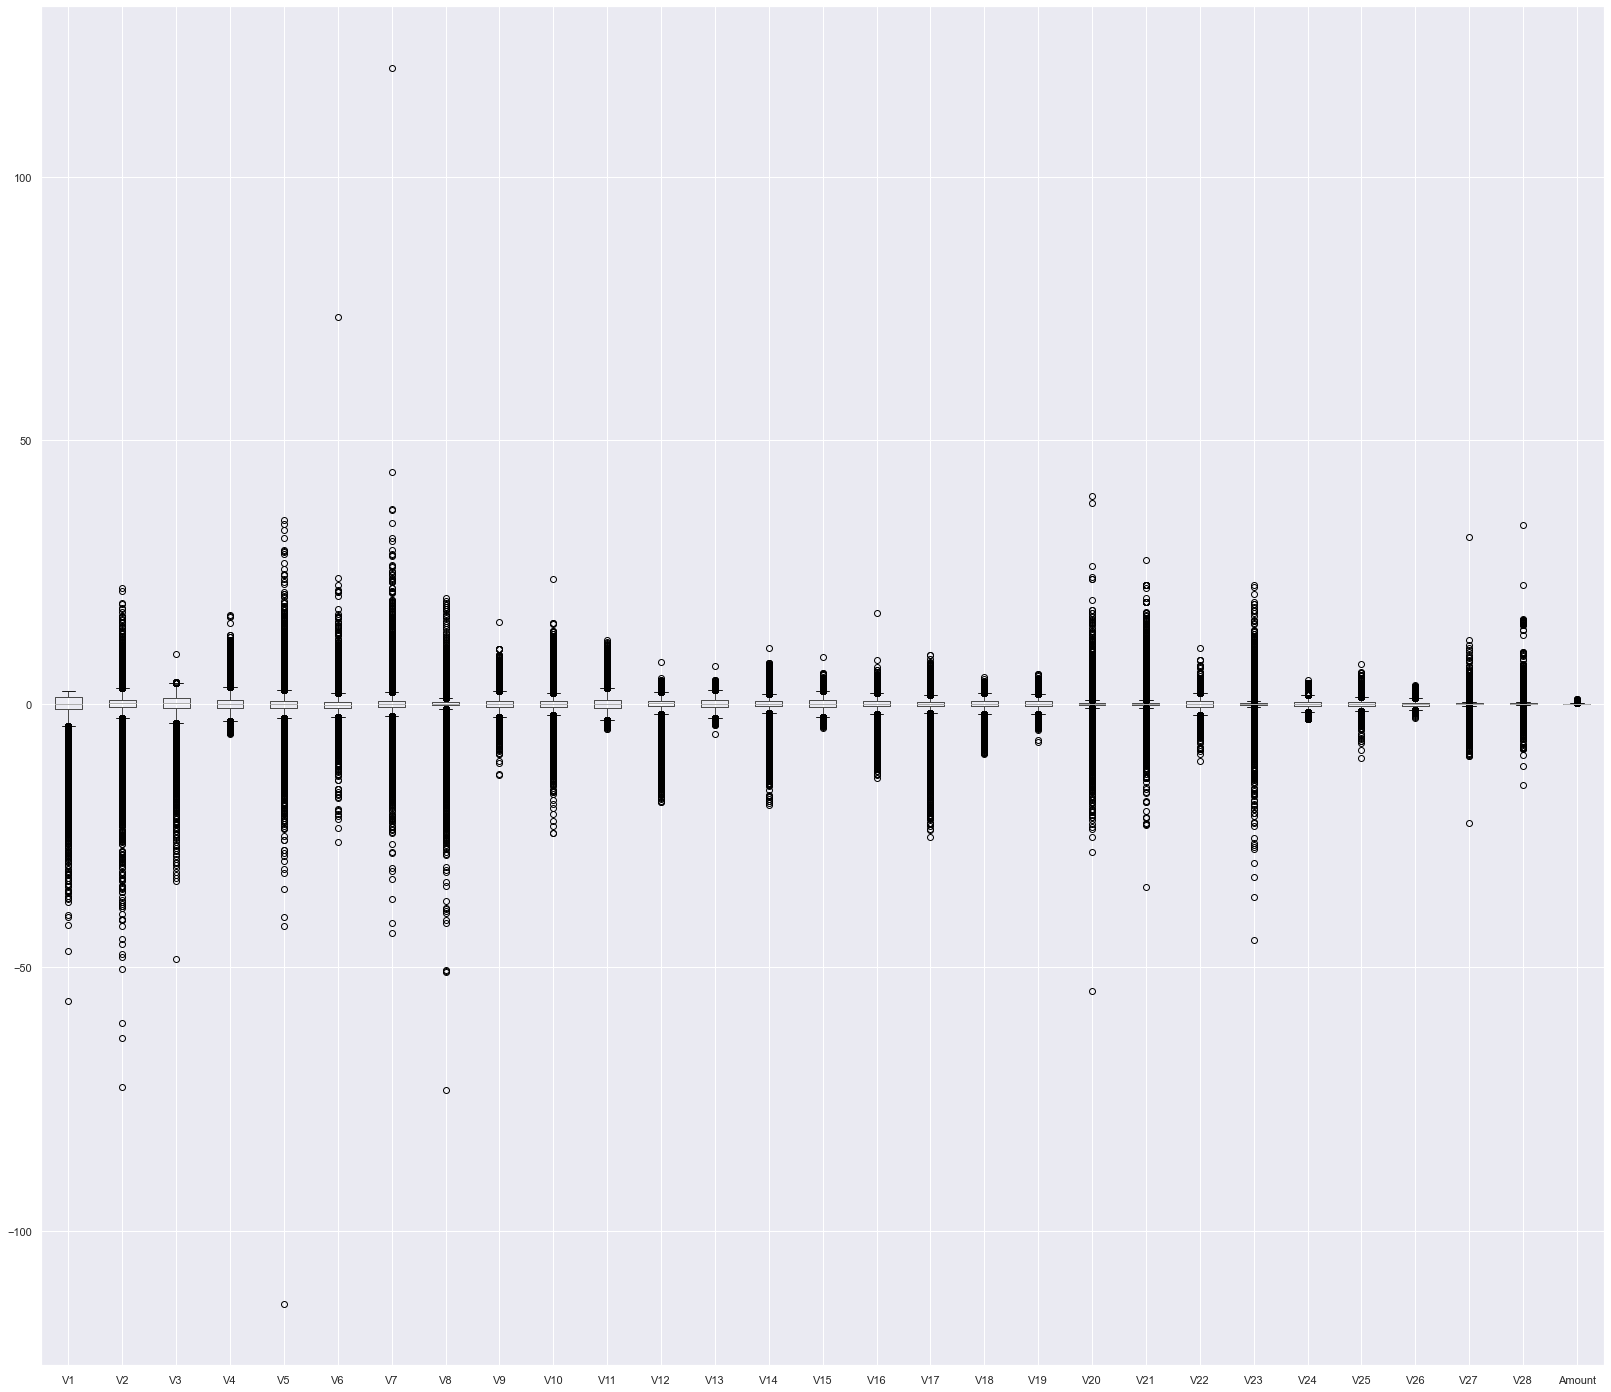

In [36]:
df_o.boxplot()

In [37]:
Q3=df_o.quantile(0.75)
Q1=df_o.quantile(0.25)
print(Q3,Q1)

V1        1.294471
V2        0.819067
V3        1.048461
V4        0.753943
V5        0.604521
V6        0.387704
V7        0.583885
V8        0.322319
V9        0.593098
V10       0.470702
V11       0.734969
V12       0.614670
V13       0.668570
V14       0.492169
V15       0.638997
V16       0.524709
V17       0.401407
V18       0.507708
V19       0.465782
V20       0.139803
V21       0.189118
V22       0.534272
V23       0.145482
V24       0.432931
V25       0.347151
V26       0.244196
V27       0.094730
V28       0.081355
Amount    0.055771
Name: 0.75, dtype: float64 V1       -0.941105
V2       -0.614040
V3       -0.843168
V4       -0.862847
V5       -0.700192
V6       -0.765861
V7       -0.552047
V8       -0.209618
V9       -0.659904
V10      -0.538968
V11      -0.772693
V12      -0.413717
V13      -0.654360
V14      -0.425932
V15      -0.596079
V16      -0.477642
V17      -0.482600
V18      -0.498396
V19      -0.464409
V20      -0.212027
V21      -0.225021
V22      -0.532173
V23 

In [38]:
IQR=Q3-Q1
IQR

V1        2.235576
V2        1.433107
V3        1.891629
V4        1.616790
V5        1.304713
V6        1.153565
V7        1.135931
V8        0.531937
V9        1.253002
V10       1.009670
V11       1.507662
V12       1.028387
V13       1.322930
V14       0.918100
V15       1.235076
V16       1.002351
V17       0.884006
V18       1.006104
V19       0.930191
V20       0.351830
V21       0.414140
V22       1.066445
V23       0.310922
V24       0.793993
V25       0.670749
V26       0.572486
V27       0.166459
V28       0.134009
Amount    0.040112
dtype: float64

In [39]:
upper_limit = Q3 + 1.5*IQR
lower_limit= Q1 - 1.5*IQR
print(lower_limit,upper_limit)

V1       -4.294469
V2       -2.763701
V3       -3.680613
V4       -3.288032
V5       -2.657261
V6       -2.496208
V7       -2.255944
V8       -1.007524
V9       -2.539408
V10      -2.053473
V11      -3.034186
V12      -1.956298
V13      -2.638755
V14      -1.803082
V15      -2.448692
V16      -1.981169
V17      -1.808610
V18      -2.007552
V19      -1.859695
V20      -0.739772
V21      -0.846231
V22      -2.131841
V23      -0.631823
V24      -1.552051
V25      -1.329720
V26      -1.187019
V27      -0.321418
V28      -0.253667
Amount   -0.044508
dtype: float64 V1        4.647835
V2        2.968727
V3        3.885905
V4        3.179128
V5        2.561590
V6        2.118051
V7        2.287782
V8        1.120225
V9        2.472601
V10       1.985208
V11       2.996462
V12       2.157251
V13       2.652965
V14       1.869319
V15       2.491610
V16       2.028236
V17       1.727416
V18       2.016865
V19       1.861068
V20       0.667548
V21       0.810328
V22       2.133940
V23       0.6118

In [40]:
 IQR

V1        2.235576
V2        1.433107
V3        1.891629
V4        1.616790
V5        1.304713
V6        1.153565
V7        1.135931
V8        0.531937
V9        1.253002
V10       1.009670
V11       1.507662
V12       1.028387
V13       1.322930
V14       0.918100
V15       1.235076
V16       1.002351
V17       0.884006
V18       1.006104
V19       0.930191
V20       0.351830
V21       0.414140
V22       1.066445
V23       0.310922
V24       0.793993
V25       0.670749
V26       0.572486
V27       0.166459
V28       0.134009
Amount    0.040112
dtype: float64

In [41]:
df1 = df_o.copy()
df1 = np.where(
    df1 > upper_limit,
    upper_limit,
    np.where(
        df1 < lower_limit,
        lower_limit,
        df1
    )
)

In [42]:
df1

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  7.63137805e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  1.02325596e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  1.15938310e-01],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  5.14018867e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.97291395e-02],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  9.19047610e-02]])

In [43]:
df2=pd.DataFrame(df1)
df2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.076314
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.010233
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.611865,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.115938
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.069333
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.052195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275658,-4.294469,2.968727,-3.680613,-2.066656,-2.657261,-2.496208,-2.255944,1.120225,1.914428,1.985208,...,0.667548,0.213454,0.111864,0.611865,-0.509348,1.353274,0.250034,0.344419,0.282369,0.005475
275659,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.031063
275660,1.919565,-0.301254,-3.249640,-0.557828,2.561590,2.118051,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.051402
275661,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.019729


In [44]:
df2.columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

In [45]:
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.076314
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.010233
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.611865,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.115938
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.069333
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.052195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275658,-4.294469,2.968727,-3.680613,-2.066656,-2.657261,-2.496208,-2.255944,1.120225,1.914428,1.985208,...,0.667548,0.213454,0.111864,0.611865,-0.509348,1.353274,0.250034,0.344419,0.282369,0.005475
275659,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.031063
275660,1.919565,-0.301254,-3.249640,-0.557828,2.561590,2.118051,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.051402
275661,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.019729


In [46]:
df2.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

<AxesSubplot:>

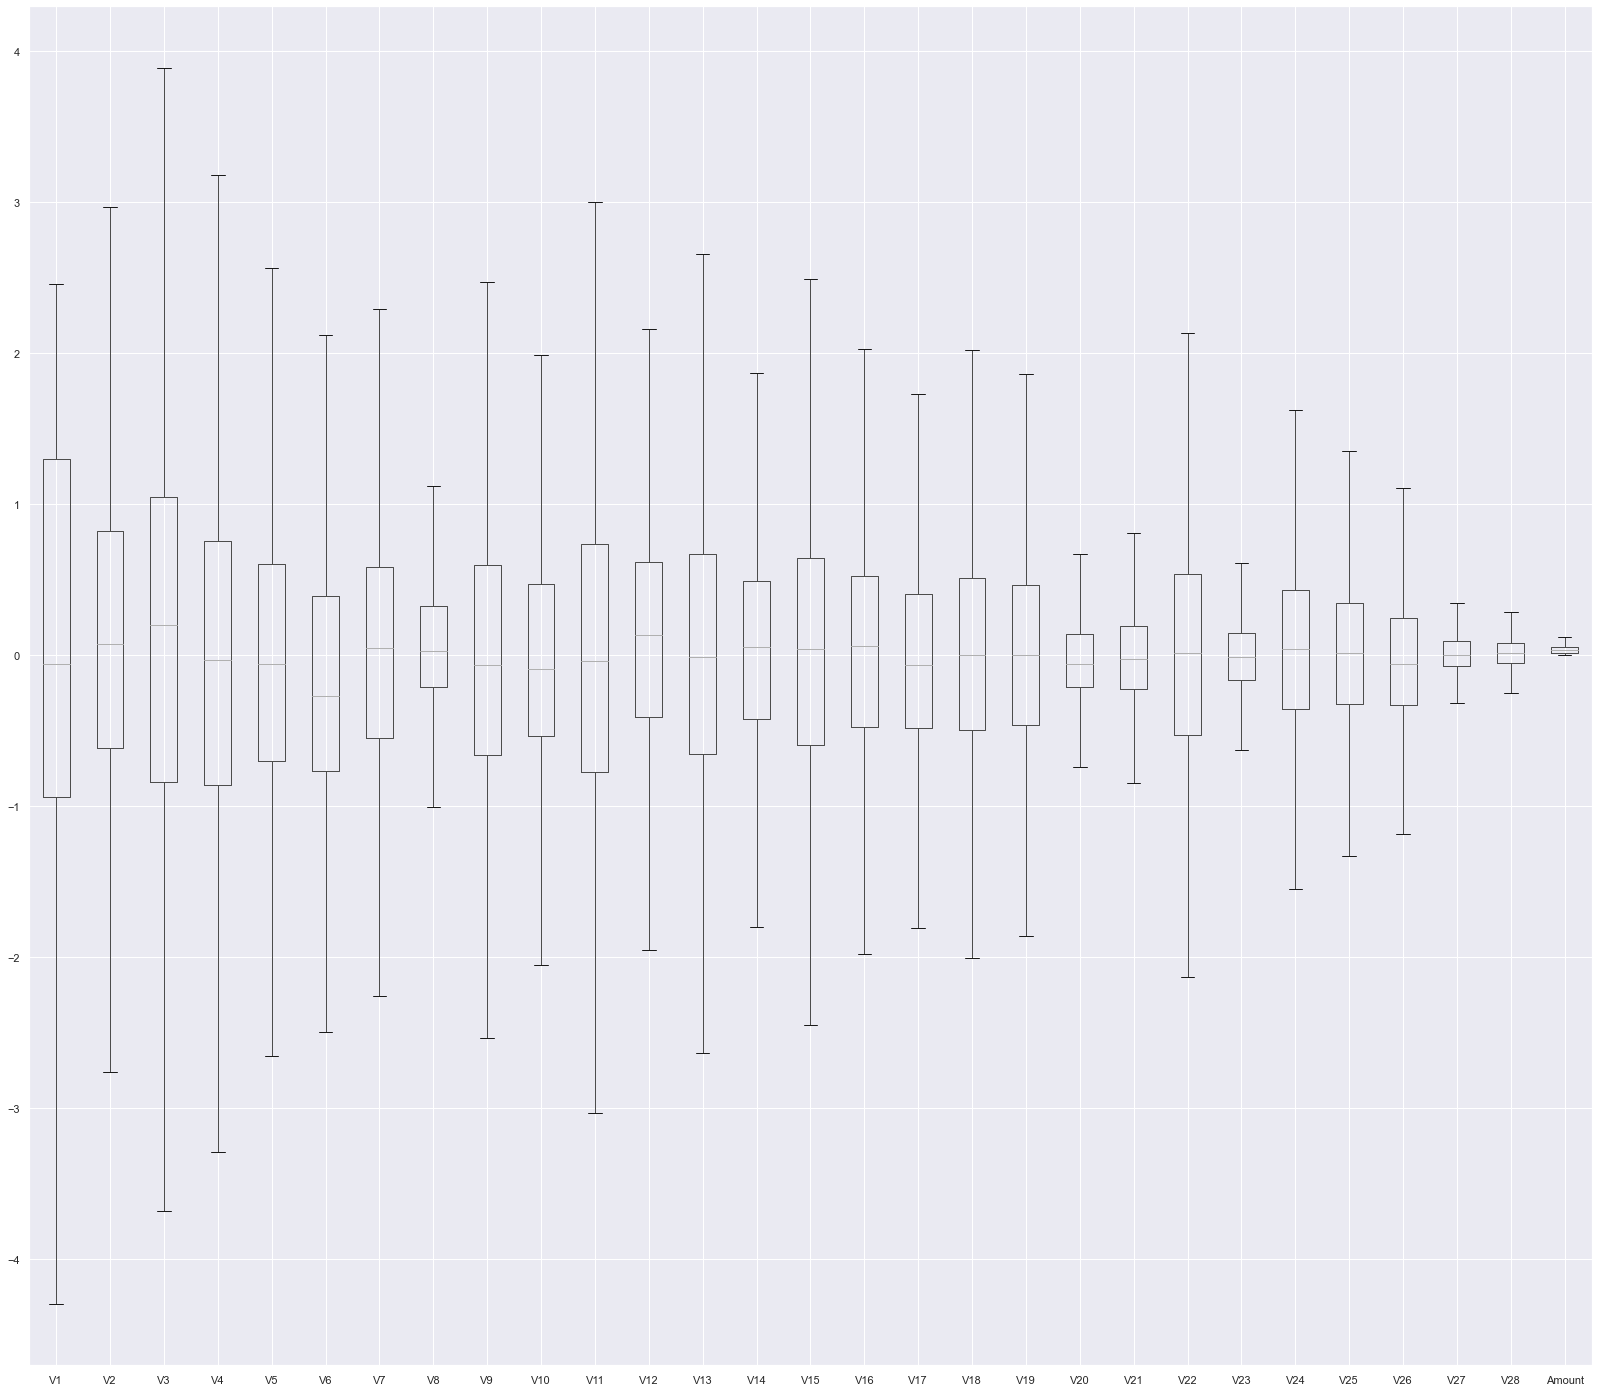

In [47]:
df2.boxplot()

In [48]:
df2.skew()

V1       -0.618948
V2       -0.146956
V3       -0.407098
V4        0.206588
V5        0.211478
V6        0.636475
V7       -0.063956
V8        0.138330
V9        0.107661
V10       0.242380
V11       0.104101
V12      -0.565046
V13       0.037016
V14      -0.099167
V15      -0.251825
V16      -0.232064
V17       0.431791
V18       0.008464
V19      -0.028693
V20       0.283533
V21       0.113313
V22      -0.049347
V23       0.069134
V24      -0.541343
V25      -0.151686
V26       0.375777
V27       0.078363
V28      -0.041887
Amount    1.040377
dtype: float64

  ### this dataset is highly unblanced

In [49]:
## 0--- normal transaction
## 1---fraudylent transaction

In [50]:
Class = df.iloc[:,-1]
df4=pd.concat([df2,Class],axis=1)

In [51]:
df4.shape

(284335, 30)

In [52]:
# seprating the data for analysis
legit = df4[df4.Class == 0]
fraud = df4[df4.Class == 1]

In [53]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [54]:
# statistical measures of the data
legit.Amount.describe()

count    266526.000000
mean          0.039729
std           0.031363
min           0.000000
25%           0.015771
50%           0.030437
75%           0.055785
max           0.115938
Name: Amount, dtype: float64

In [55]:
fraud.Amount.describe()

count    465.000000
mean       0.039470
std        0.031235
min        0.000000
25%        0.016329
50%        0.028508
75%        0.057180
max        0.115938
Name: Amount, dtype: float64

In [56]:
 # Compare  the value for both transactions
df4.groupby('Class').mean() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,0.038052,0.047987,0.053402,-0.030896,-0.014716,-0.099636,0.016692,0.064760,-0.028049,-0.026116,...,-0.024565,-0.012294,0.008350,-0.007255,-0.004958,-0.000815,-0.004311,0.013565,0.011985,0.039729
1.0,0.117004,0.030007,0.151532,0.071250,0.001694,-0.097125,-0.012006,0.060955,0.226441,-0.097616,...,-0.015276,-0.014333,-0.029056,0.009809,-0.015017,-0.057956,-0.002059,0.012425,0.006861,0.039470


## under-sampling

### Build a sample dataset containing similar distrubution and fraudulent transaction

Number of fraudulent Transaction--> 492

In [57]:
legit_sample= legit.sample(n=473)
legit_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199571,-1.225107,-0.864711,2.038589,3.179128,1.956006,0.131463,-1.274207,0.482988,-1.138972,1.041912,...,0.263635,0.220023,0.437546,0.585144,-0.237048,-0.013521,-0.048299,0.001988,0.036534,0.0
41029,-1.161314,-0.023823,1.161471,-1.118558,0.051322,-1.181254,1.341896,-0.674837,0.592382,0.197199,...,-0.260909,-0.166488,-0.106191,0.450579,-0.210421,0.710237,-0.087440,-0.198841,0.077974,0.0
31938,1.288949,-0.639807,0.584402,-0.567971,-0.955000,-0.143572,-0.714722,0.094473,-0.741155,0.610680,...,0.074238,0.306630,0.005557,0.254856,0.430883,-0.245170,0.027356,0.002339,0.021612,0.0
87136,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,-0.713041,...,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,0.066079,0.0
199679,-1.146367,0.834261,1.765188,-1.147465,-0.296693,0.681381,-0.444252,0.944236,0.084516,-0.868749,...,0.028879,-0.002168,-0.298290,0.283323,0.309169,0.601106,0.118634,0.051678,0.006239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
140590,1.806130,-0.340625,-0.672560,1.147419,0.091901,0.442575,-0.256442,0.009120,0.719032,0.053793,...,-0.137966,-0.450213,0.217234,-0.004324,-0.264057,-0.942898,0.046185,-0.004049,0.064536,0.0
85463,-1.118980,-0.014418,1.003283,-1.388318,-0.564135,2.021013,0.974314,0.170433,0.685202,-0.857053,...,-0.274123,-0.389268,-0.316999,-1.552051,0.040428,0.876230,-0.262145,-0.022115,0.102732,0.0
169295,2.023157,0.010124,-1.708942,0.400990,0.563819,-0.622242,0.440404,-0.270526,-0.047753,0.265414,...,0.037004,0.262304,0.076163,0.837818,0.225848,0.319617,-0.088447,-0.072831,0.025716,0.0


In [58]:
## Concatenating two dataframe
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [59]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199571,-1.225107,-0.864711,2.038589,3.179128,1.956006,0.131463,-1.274207,0.482988,-1.138972,1.041912,...,0.263635,0.220023,0.437546,0.585144,-0.237048,-0.013521,-0.048299,0.001988,0.036534,0.0
41029,-1.161314,-0.023823,1.161471,-1.118558,0.051322,-1.181254,1.341896,-0.674837,0.592382,0.197199,...,-0.260909,-0.166488,-0.106191,0.450579,-0.210421,0.710237,-0.087440,-0.198841,0.077974,0.0
31938,1.288949,-0.639807,0.584402,-0.567971,-0.955000,-0.143572,-0.714722,0.094473,-0.741155,0.610680,...,0.074238,0.306630,0.005557,0.254856,0.430883,-0.245170,0.027356,0.002339,0.021612,0.0
87136,-0.815634,-0.244177,2.591455,-0.002720,-0.644497,0.418909,0.255767,0.115134,0.649661,-0.713041,...,-0.133162,-0.239654,0.095507,0.125146,-0.118362,1.077141,-0.173607,-0.148471,0.066079,0.0
199679,-1.146367,0.834261,1.765188,-1.147465,-0.296693,0.681381,-0.444252,0.944236,0.084516,-0.868749,...,0.028879,-0.002168,-0.298290,0.283323,0.309169,0.601106,0.118634,0.051678,0.006239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
280143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
280149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
281144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [60]:
new_dataset.isnull().sum()

V1        23
V2        23
V3        23
V4        23
V5        23
V6        23
V7        23
V8        23
V9        23
V10       23
V11       23
V12       23
V13       23
V14       23
V15       23
V16       23
V17       23
V18       23
V19       23
V20       23
V21       23
V22       23
V23       23
V24       23
V25       23
V26       23
V27       23
V28       23
Amount    23
Class      0
dtype: int64

In [61]:
new_dataset.dropna(inplace=True)

In [62]:
new_dataset.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
new_dataset['Class'].value_counts()

1.0    465
0.0    458
Name: Class, dtype: int64

In [64]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,0.013592,0.009836,-0.026444,-0.027019,0.051854,-0.103913,0.013694,0.055460,-0.006286,0.001193,...,-0.031082,-0.025040,0.055541,0.001024,-0.007129,-0.040463,-0.007041,0.005403,0.000659,0.037608
1.0,0.117004,0.030007,0.151532,0.071250,0.001694,-0.097125,-0.012006,0.060955,0.226441,-0.097616,...,-0.015276,-0.014333,-0.029056,0.009809,-0.015017,-0.057956,-0.002059,0.012425,0.006861,0.039470


In [65]:
## spliting the data into feature & target
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [66]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
199571 -1.225107 -0.864711  2.038589  3.179128  1.956006  0.131463 -1.274207   
41029  -1.161314 -0.023823  1.161471 -1.118558  0.051322 -1.181254  1.341896   
31938   1.288949 -0.639807  0.584402 -0.567971 -0.955000 -0.143572 -0.714722   
87136  -0.815634 -0.244177  2.591455 -0.002720 -0.644497  0.418909  0.255767   
199679 -1.146367  0.834261  1.765188 -1.147465 -0.296693  0.681381 -0.444252   
...          ...       ...       ...       ...       ...       ...       ...   
263877  2.102298  0.377490 -2.487300  0.769404  1.576496 -0.157481  0.816510   
268375  0.149860  1.010229 -1.090701  0.003993  0.145950 -1.380334  0.648215   
272521  2.029360  0.118940 -1.805157  0.221952  0.712460 -0.276126  0.123426   
274382 -1.419698 -0.337455  0.881790 -0.074813  1.024147 -1.553433  0.781201   
274475  2.033903 -0.009074 -1.423896  0.142760  0.331706 -0.624728  0.155860   

              V8        V9       V10  .

In [67]:
print(Y)

199571    0.0
41029     0.0
31938     0.0
87136     0.0
199679    0.0
         ... 
263877    1.0
268375    1.0
272521    1.0
274382    1.0
274475    1.0
Name: Class, Length: 923, dtype: float64


In [68]:
## split the data into training data & testing data
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=2)

In [69]:
print(X.shape,X_train.shape,X_test.shape)

(923, 29) (738, 29) (185, 29)


## Logistic regression


In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [71]:
# training the logistic regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

In [72]:
model.coef_

array([[ 0.05969377,  0.09435255,  0.05143071, -0.00185554, -0.04529572,
         0.01345995, -0.02629871,  0.08948756,  0.1182517 , -0.13561443,
         0.22883941, -0.24524885,  0.20137433, -0.00729795,  0.0007915 ,
        -0.09985081,  0.10010752, -0.13112169,  0.02206709,  0.11516857,
         0.75500098, -0.34421057, -0.06931701, -0.01275425, -0.14084762,
        -0.07203042,  0.08191107, -0.27712641,  0.36329842]])

In [73]:
# Evaluation
# Accuracy Score

In [74]:
# Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 0.5880758807588076


In [75]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data :',test_data_accuracy)

Accuracy on test data : 0.5081081081081081


## KNeighbors Alg

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [77]:
# Training data accuracy

train_prediction = knn.predict(X_train)
training_accuracy = accuracy_score(train_prediction,Y_train)

print('Accuracy on KNN training data : ',training_accuracy)

Accuracy on KNN training data :  0.6802168021680217


In [78]:
# Testing data accuracy

test_prediction = knn.predict(X_test)
test_accuracy = accuracy_score(test_prediction,Y_test)

print('Accuracy on KNN test data : ',test_accuracy) 

Accuracy on KNN test data :  0.4972972972972973


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [80]:
# Training data accuracy

train_prediction = decision.predict(X_train)
training_accuracy = accuracy_score(train_prediction,Y_train)
print('Accuracy on DecisionTree training data : ',training_accuracy)

Accuracy on DecisionTree training data :  1.0


In [81]:
# Testing data accuracy
 
test_prediction = decision.predict(X_test)
test_accuracy = accuracy_score(test_prediction,Y_test)
print('Accuracy on DecisionTree test data : ',test_accuracy)

Accuracy on DecisionTree test data :  0.5459459459459459


# RandomForestClassifier 

In [82]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier()
randomForest.fit(X_train,Y_train)

RandomForestClassifier()

In [83]:
## Training data accuracy
train_prediction = randomForest.predict(X_train)
training_accuracy = accuracy_score(train_prediction,Y_train)
print('Accuracy on DecisionTree training data : ',training_accuracy)

Accuracy on DecisionTree training data :  1.0


In [84]:
# Testing data accuracy
 
test_prediction = randomForest.predict(X_test)
test_accuracy = accuracy_score(test_prediction,Y_test)
print('Accuracy on DecisionTree test data : ',test_accuracy)

Accuracy on DecisionTree test data :  0.5351351351351351


In [85]:
!pip install prettytable 

In [86]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, confusion_matrix

In [87]:
from sklearn.linear_model import LogisticRegression # works on linear algebra
from sklearn.tree import DecisionTreeClassifier #gini index entropy
from sklearn.ensemble import RandomForestClassifier # gini index entropy
from sklearn.neighbors import KNeighborsClassifier # ecludian distance
from sklearn.svm import SVC # hyperline
from sklearn.naive_bayes import GaussianNB # probability

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
# for table
from prettytable import PrettyTable

 # Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score", "MCC(phi)"])

def model_evalution(xTrain, xTest, yTrain, yTest, model):
    obj = model()
    obj.fit(xTrain, yTrain)
    predict = obj.predict(xTest)
    
    # get the model name
    x = str(model)
    x1 = x.split('.')[-1]
    x2 = x1.split("'")[0]
    
    # Classification report
    acc = str(round(accuracy_score(yTest, predict)*100, 2)) + '%'
    prec = str(round(precision_score(yTest, predict)*100, 2)) + '%'
    rec = str(round(recall_score(yTest, predict)*100, 2)) + '%'
    f1 = str(round(f1_score(yTest, predict)*100, 2)) + '%'
    MCC = str(round(matthews_corrcoef(yTest, predict)*100, 2)) + '%'
    
    myTable.add_row([x2, acc, prec, rec, f1, MCC]) 

In [90]:
# print(myTable)

In [91]:
! pip install xgboost
from xgboost import XGBClassifier

In [92]:
# model_evalution(X_train,X_test,Y_train,Y_test,LogisticRegression)
print(myTable)


+-----------+----------+-----------+--------+----------+----------+
| Algorithm | Accuracy | Precision | Recall | F1-Score | MCC(phi) |
+-----------+----------+-----------+--------+----------+----------+
+-----------+----------+-----------+--------+----------+----------+
